1) What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class.

Inductive Reasoning is a way to draw conclusions by going from specific information to general conclusion, like sickness, where you see specific 
symptoms like a cough, dry throat, or congestion, then you find a general solution like a common cold.

Deductive Reasoning is the opposite of inductive, moving from general information to a specific conclusion, usually in a A=B, B=C, so A=C format. For
example, Cats are cool, all cool things are cute, therefore all cats are cute. 

In [74]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, f1_score, auc

2) Preprocess your dataset. (I'm using the Credit Card.csv)

In [248]:
cc = pd.read_csv("Credit_card.csv")

In [229]:
#changing simple binary answers like gender to 1 and 2
def change_dt(x):
    xy = {'M':0,'F':1}
    cc['GENDER'] = cc['GENDER'].map(xy)

    co = {'Y':0,'N':1}
    cc['Car_Owner'] = cc['Car_Owner'].map(co)

    po = {'Y':0,'N':1}
    cc['Propert_Owner'] = cc['Propert_Owner'].map(po)
    

In [230]:
change_dt("Credit_card.csv")

In [231]:
cc = cc.drop('Type_Occupation', axis=1)
cc = cc.drop('EDUCATION', axis=1)
cc = cc.drop('Marital_status', axis=1)
cc = cc.drop('Housing_type', axis=1)
cc = cc.drop('Type_Income', axis=1)

3) Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

In [223]:
def dt(x):
    X = cc.drop('Car_Owner',axis=1)
    y = cc['Car_Owner']

    #split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                        test_size=0.3,
                                                        random_state=42)
    
    model = tree.DecisionTreeClassifier(max_depth=7, random_state=42, min_impurity_decrease=0.01)
    
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

    tree.plot_tree(model, feature_names=list(X.columns),
               filled=True, fontsize=6, rounded=True)

    plt.show()


              precision    recall  f1-score   support

           0       0.66      0.57      0.61       203
           1       0.70      0.77      0.73       262

    accuracy                           0.68       465
   macro avg       0.68      0.67      0.67       465
weighted avg       0.68      0.68      0.68       465



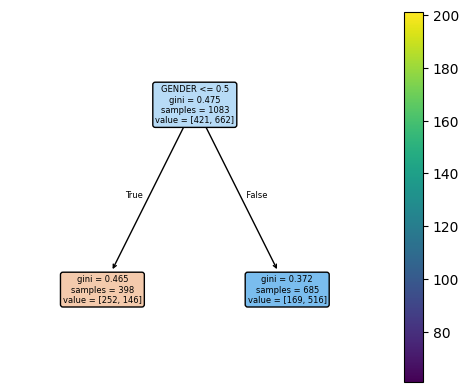

In [224]:
dt("Credit_card.csv")

4) Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

In [236]:
def rf(x):
    global X_test, X_train
    sc = StandardScaler()
    X_test = sc.fit_transform(X_test)
    X_train = sc.fit_transform(X_train)
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf = rf.fit(X_train, y_train)
    rf.score(X_test, y_test)

    print(rf.feature_importances_, X.columns)

    rf_tree = rf.estimators_[4]
    tree.plot_tree(rf_tree)
    plt.savefig("rf_tree.svg")

[0.17974954 0.11601106 0.0255052  0.02797483 0.17281117 0.20116578
 0.16511342 0.         0.01867285 0.02725583 0.01509576 0.05064457] Index(['Ind_ID', 'GENDER', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Family_Members'],
      dtype='object')


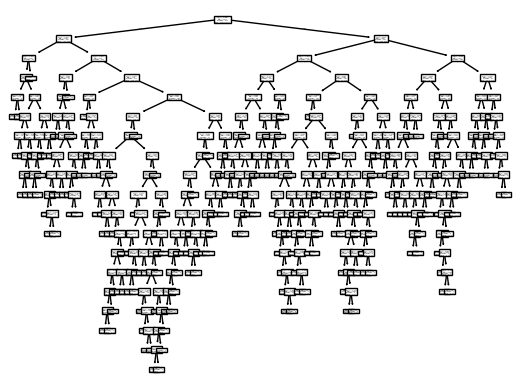

In [237]:
rf("Credit_card.csv")

5) Create an xgboost model tuned to the best of your abilities. Explain how you tuned it.

In [243]:
def xgmodel1(x):
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)

    y_pred = xgb.predict(X_test)

    ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

    print(type(y_test))
    print(type(y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(fpr, tpr)
    auc

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[0.         0.48275862 1.        ] [0.         0.80534351 1.        ]


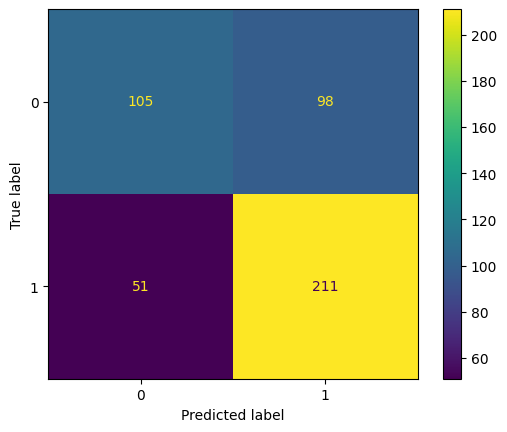

In [244]:
xgmodel1("Credit_Card.csv")

In [253]:
def xgmodel2(x):
    gla
    plt.plot(recall, precision, marker = ".")
    plt.xlabel("Recall")
    plt.ylabel("Precision")

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall, precision)
    pr_auc

    plt.plot(recall, precision, marker = ".")
    plt.xlabel("Recall")
    plt.ylabel("Precision")